# 3.1 標本調査

In [1]:
import pandas as pd
import numpy as np
from scipy import stats, signal, special
import seaborn as sns
import warnings

sns.set_theme()
warnings.simplefilter("ignore")

- サンプルサイズ:
    - $N=100$
- 変数$Y$
    - $i$番目の人が政策を支持しているとき:  $Y_i = 1$
    - $i$番目の人が政策を支持していないとき:    $Y_i = 0$

## a

### $Pr(Y_1 = y_1, \cdots, Y_{100} = y_{100})$ を簡単な形で表す

$Y_1 , \cdots, Y_{100}$ が条件付き独立ということから、

$$
Pr(Y_1 = y_1, \cdots, Y_{100} = y_{100})
= \prod _{i=1} ^{100} Pr(Y_{i} = y_{i} | \theta)
$$

と書ける。

期待値 $\theta$ をもつ二値確率変数の分布関数は

$$
Pr(Y_{i} = y_{i}|\theta)
= \theta^{y_i} (1 - \theta) ^{1 - y_i}
$$

と表すことができる。（これはベルヌーイ分布である）

以上より、

$$
\begin{aligned}
Pr(Y_1 = y_1, \cdots, Y_{100} = y_{100})
&= \prod _{i=1} ^{100} \theta^{y_i} (1 - \theta) ^{1 - y_i} \\
&= \theta^{\sum _{i} y_i} (1 - \theta) ^{100 - \sum _{i} y_i}
\end{aligned}
$$

と表すことができる。
（これは互いに独立で同一のパラメータのベルヌーイ分布に従う100個の確率変数の同時確率である）

### $Pr(\sum _{i} Y_{i} = y | \theta)$ を求める

$Y = \sum _{i} Y_{i}$ とすると、 確率変数 $Y$ はパラメータ $(n=100, \theta)$ を持つ二項分布に従う。
よって、確率分布は

$$
Pr(\sum _{i} Y_{i} = y | \theta)
= \binom{100}{y}\theta^{y}(1 - \theta)^{100 - y}
$$

となる。

## b

In [2]:
Y = 57
N = 100

df_3_1 = pd.DataFrame()

df_3_1["theta"] = np.linspace(0.0, 1.0, 11)

# 二項分布の確率関数から確率を計算
df_3_1["likelifood"] = df_3_1["theta"].apply(
    lambda theta: stats.binom.pmf(k=Y, n=N, p=theta)
)

df_3_1

,theta,likelifood
0,0.0,0.000000e+00
1,0.1,4.107157e-31
2,0.2,3.738459e-16
3,0.3,1.306895e-08
4,0.4,2.285792e-04
5,0.5,3.006864e-02
6,0.6,6.672895e-02
7,0.7,1.853172e-03
8,0.8,1.003535e-07
9,0.9,9.395858e-18


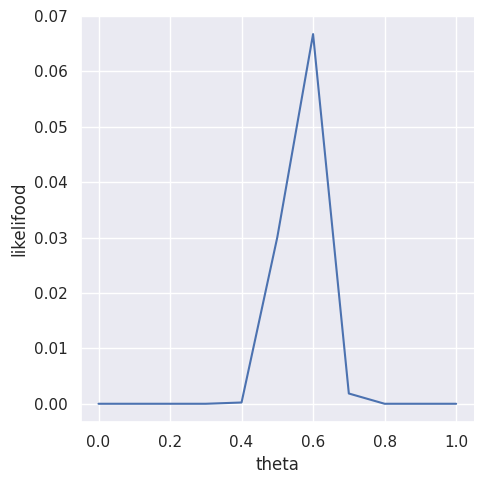

In [3]:
_ = sns.relplot(
    df_3_1,
    x="theta",
    y="likelifood",
    kind="line",
)

## c

ベイズルールを用いると

$$
p\left(\theta | \sum _{i=1}^{100} Y_{i} = 57 \right)
=
\frac{
    p(\sum _{i=1}^{100} Y_{i} = 57 | \theta)p(\theta)
}{
    p(\sum _{i=1}^{100} Y_{i} = 57)
}
$$

と書ける。

ここで、$\theta$ について事前情報がないということから、

$$
\begin{aligned}
p(\theta) &= \frac{1}{11} \\
p \left(\sum _{i=1}^{100} Y_{i} = 57 \right) &=  \sum _{\theta} p \left(\sum _{i=1}^{100} Y_{i} = 57 | \theta \right) \times \frac{1}{11}
\end{aligned}
$$

である。

In [4]:
# thetaの事前分布
# すべての値に対して 1 / 11
prior_theta = 1 / 11

# 周辺尤度
marginal_likelihood = df_3_1["likelifood"].sum() * prior_theta
print(f"{marginal_likelihood=}")

df_3_1["posterior"] = df_3_1["likelifood"].mul(prior_theta).div(marginal_likelihood)

df_3_1

marginal_likelihood=0.008989041496797676


,theta,likelifood,posterior
0,0.0,0.000000e+00,0.000000e+00
1,0.1,4.107157e-31,4.153701e-30
2,0.2,3.738459e-16,3.780824e-15
3,0.3,1.306895e-08,1.321705e-07
4,0.4,2.285792e-04,2.311695e-03
5,0.5,3.006864e-02,3.040939e-01
6,0.6,6.672895e-02,6.748515e-01
7,0.7,1.853172e-03,1.874172e-02
8,0.8,1.003535e-07,1.014907e-06
9,0.9,9.395858e-18,9.502335e-17


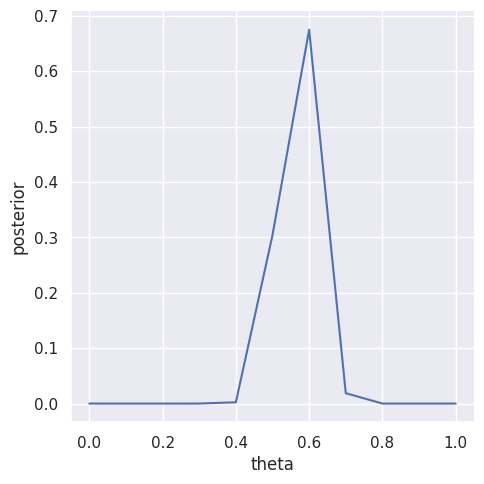

In [5]:
_ = sns.relplot(
    df_3_1,
    x="theta",
    y="posterior",
    kind="line",
)

## d

In [6]:
df_3_1_continuous = pd.DataFrame()

n_points = 200
df_3_1_continuous["theta"] = np.linspace(0, 1, n_points)

df_3_1_continuous["likelihood"] = df_3_1_continuous["theta"].apply(
    lambda theta: stats.binom.pmf(k=Y, n=N, p=theta)
)

df_3_1_continuous.head()

,theta,likelihood
0,0.000000,0.000000e+00
1,0.005025,2.834059e-103
2,0.010050,3.285211e-86
3,0.015075,2.875599e-76
4,0.020101,3.052907e-69


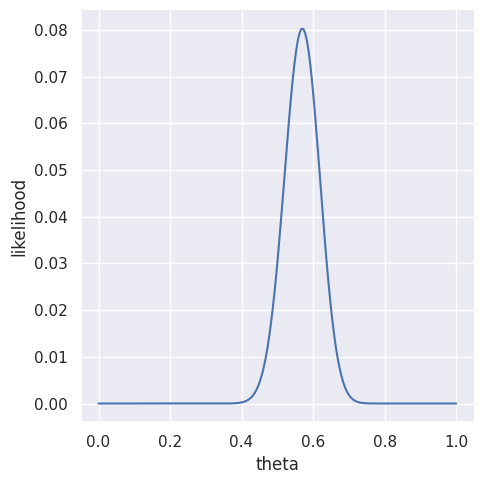

In [7]:
_ = sns.relplot(
    df_3_1_continuous,
    x="theta",
    y="likelihood",
    kind="line",
)

## e

In [8]:
df_3_1_posterior = pd.DataFrame()

n_points = 200
df_3_1_posterior["theta"] = np.linspace(0, 1, n_points)

a = 1 + Y
b = 1 + N - Y
df_3_1_posterior["posterior"] = df_3_1_posterior["theta"].apply(
    lambda theta: stats.beta.pdf(x=theta, a=a, b=b)
)

df_3_1_posterior.head()

,theta,posterior
0,0.000000,0.000000e+00
1,0.005025,2.862400e-101
2,0.010050,3.318063e-84
3,0.015075,2.904355e-74
4,0.020101,3.083436e-67


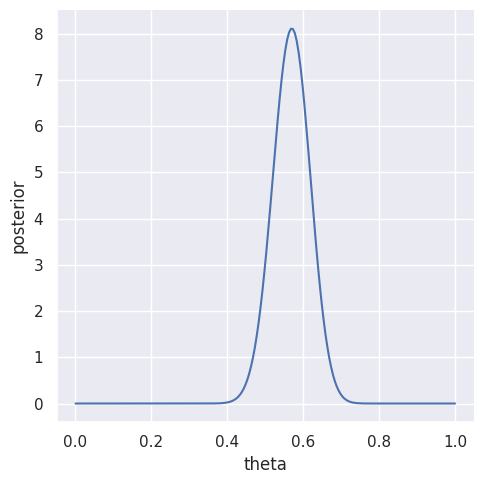

In [9]:
_ = sns.relplot(
    df_3_1_posterior,
    x="theta",
    y="posterior",
    kind="line",
)

- b, cの図は同じ形でスケールだけ異なる
- d, eの図は同じ形でスケールだけ異なる